# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `5` | `Questions`

> Hi, Team. 👋

> Here we go again. The current notebook contains 10 questions that help you review our course content.

> Try to answer questions within a 120-minute time limit (and you may refer to lecture notes and review scripts while you are answering). This kind of timed task will improve your performance and prepare you well for the assessment down the line. Once you complete this, submit your script via eLearn.

> Enjoy!"🤞

### For standardization of your answers…

> Please execute the lines of code below before you start work on your answers.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf

> Let's set some print option.

In [2]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

## 👇 Questions 1 to 4 ask you to build, execute, and backtest a `mean-reversion` strategy.

### <font color = blue> 👉 Question 1</font>. Let’s take a look at Google (`GOOGL`) as our security of interest, over the period of August 2011 to July 2020.

### Use a simple moving average of 42 days.

### Set a threshold value at two standard deviations of the current price, to deviate from the simple moving average to signal a positioning.

### <font color = green> NOTE: Your moving threshold value here is NOT an absolute value. You should create two additional columns containing your two standard deviations relative to your base line (a simple moving average of 42 days). </font>

### Visualize your buy positions by setting `fmt` (format string) at `g^`, and your sell positions by setting fmt at `rv`.

### Below are the lines of code that lead to an answer:

In [3]:
#get data
yf.pdr_override()
google = pdr.get_data_yahoo("GOOGL", dt.datetime(2011, 8, 1), dt.datetime(2020, 8, 1))
google.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-08-01,15.295796,15.402903,14.994494,15.184434,15.184434,158485356
2011-08-02,15.165165,15.257007,14.804054,14.824825,14.824825,127895976
2011-08-03,14.871622,15.090090,14.605355,15.044294,15.044294,152874972
2011-08-04,14.877377,14.986236,14.451201,14.452452,14.452452,196387416
2011-08-05,14.578078,14.764765,14.064064,14.490490,14.490490,236926836


In [4]:
google["Log_return"] = np.log(google["Close"]/google["Close"].shift(1))
google.head()

,Open,High,Low,Close,Adj Close,Volume,Log_return
Date,,,,,,,
2011-08-01,15.295796,15.402903,14.994494,15.184434,15.184434,158485356,NaN
2011-08-02,15.165165,15.257007,14.804054,14.824825,14.824825,127895976,-0.023968
2011-08-03,14.871622,15.090090,14.605355,15.044294,15.044294,152874972,0.014696
2011-08-04,14.877377,14.986236,14.451201,14.452452,14.452452,196387416,-0.040135
2011-08-05,14.578078,14.764765,14.064064,14.490490,14.490490,236926836,0.002629


In [5]:
google["SMA_42"] = google["Close"].rolling(window=42).mean()
#google.head(42)

In [6]:
google["Distance"] = google["Close"] - google["SMA_42"]
google["Upper_threshold"] = 2*google["Close"].rolling(window=42).std()
google["Lower_threshold"] = -2*google["Close"].rolling(window=42).std()

In [7]:
google["Trading_position"] = np.where(google["Distance"] > google["Upper_threshold"], -1, np.nan)
google["Trading_position"] = np.where(google["Distance"] < google["Lower_threshold"], 1, google["Trading_position"])
google["Trading_position"] = np.where(google["Distance"]*google["Distance"].shift(1) < 0, 0, google["Trading_position"])
google["Trading_position"].ffill(inplace=True)

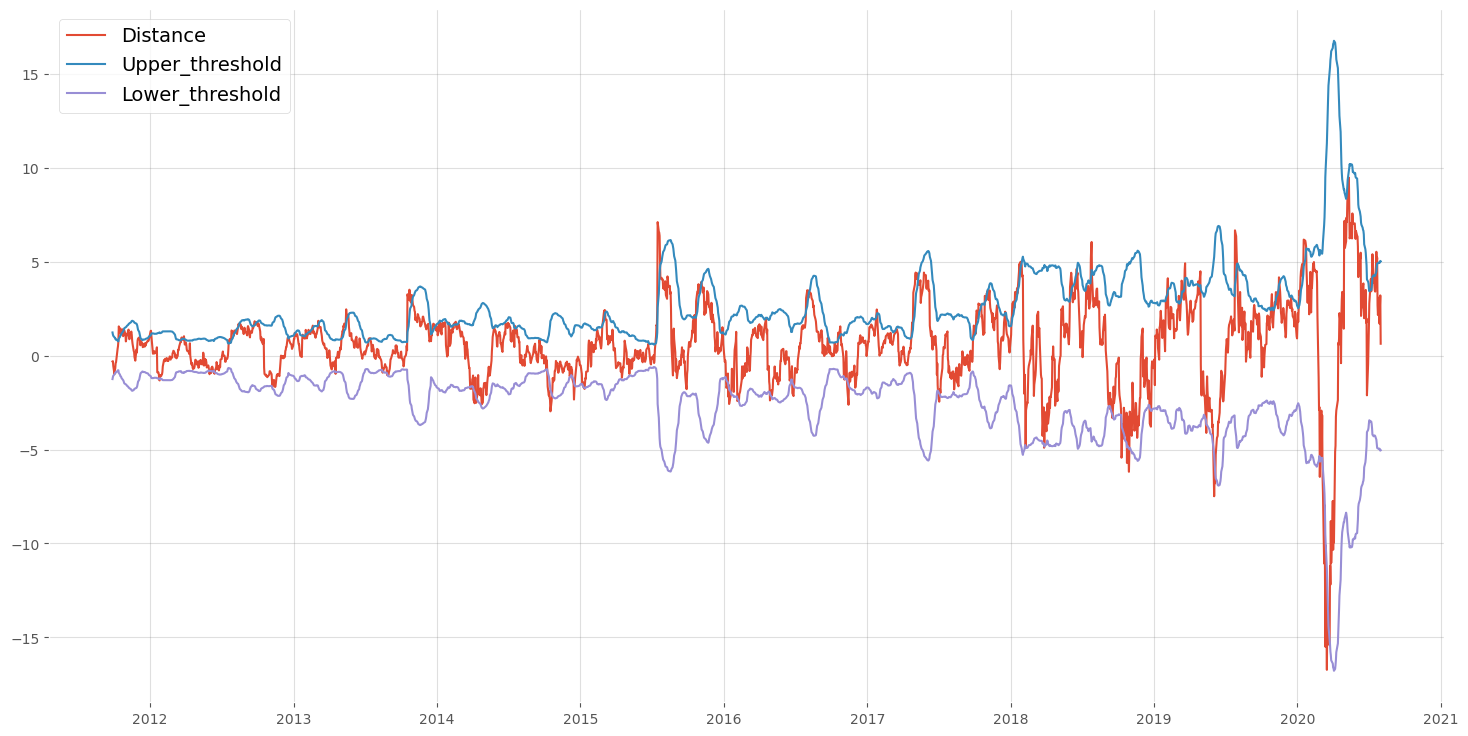

In [8]:
google1 = google.copy()
#google1.dropna(inplace=True)
plt.figure(figsize = (18,9))

plt.plot(google1["Distance"], label = "Distance")
plt.plot(google1["Upper_threshold"], label="Upper_threshold")
plt.plot(google1["Lower_threshold"], label = "Lower_threshold")


plt.legend()
plt.show()

In [9]:
mask = (google1["Trading_position"]!=google1["Trading_position"].shift(1))
google1["Signal"] = google1["Trading_position"].where(mask, 0)

### <font color = red> Answer 1 is presented in the cell below: </font>

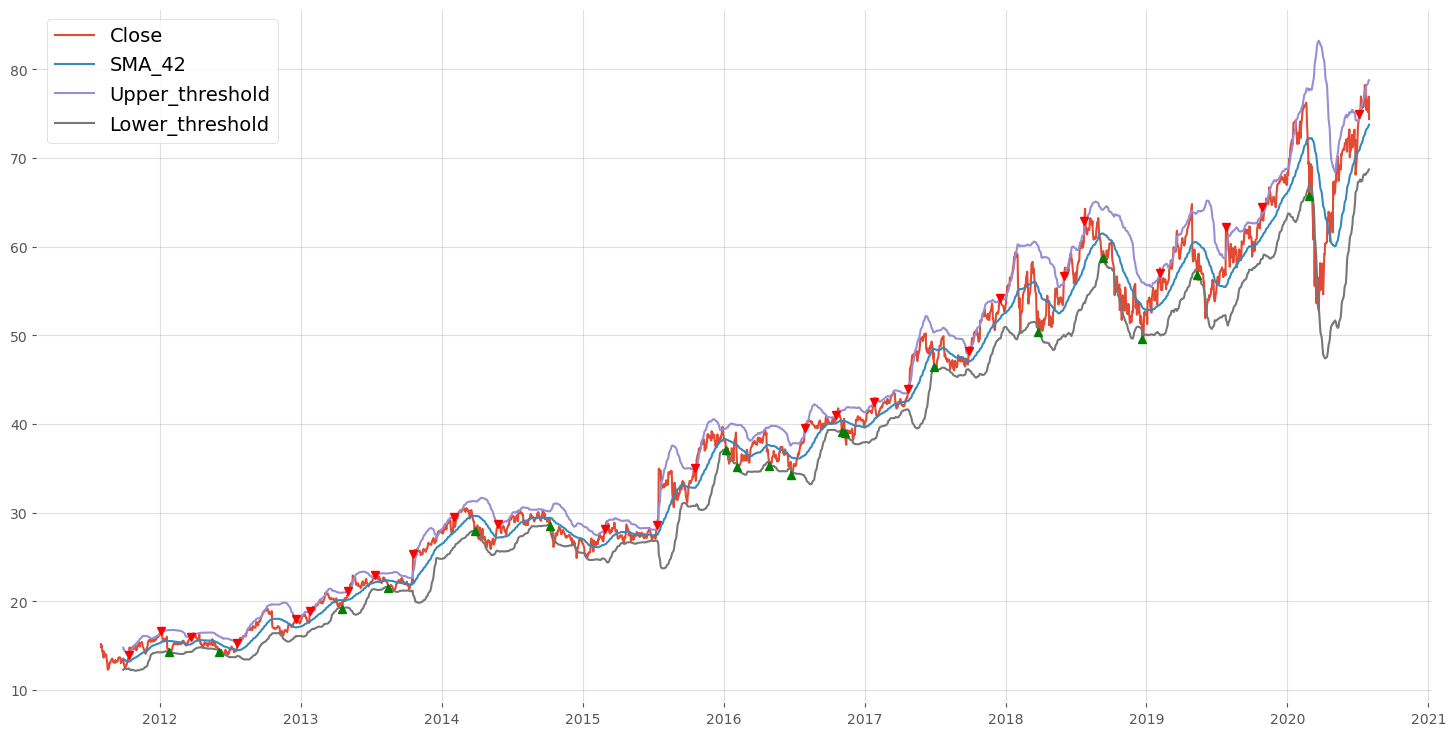

In [10]:
plt.figure(figsize=(18,9))

plt.plot(google1["Close"], label="Close")
plt.plot(google1["SMA_42"], label="SMA_42")
plt.plot(google1["SMA_42"]+google1["Upper_threshold"], label="Upper_threshold")
plt.plot(google1["SMA_42"]+google1["Lower_threshold"], label="Lower_threshold")

plt.plot(google1[google1["Signal"]==1]["Close"],"g^")
plt.plot(google1[google1["Signal"]==-1]["Close"],"rv")

plt.legend()
plt.show()

### <font color = blue> 👉 Question 2</font>. Let’s expand this strategy to two more securities, Apple (`AAPL`) and Amazon (`AMZN`) over the same period of August 2011 to July 2020. 

### When using the strategy above, which of those two securities has the greater Sharpe Ratio?

### Below are the lines of code that lead to an answer:

In [11]:
appl = pdr.get_data_yahoo("AAPL", dt.datetime(2011,8,1), dt.datetime(2020,8,1))
amaz = pdr.get_data_yahoo("AMZN", dt.datetime(2011,8,1), dt.datetime(2020,8,1))

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [12]:
appl["Log_return"] = np.log(appl["Close"]/appl["Close"].shift(1))

In [13]:
appl["SMA_42"] = appl["Close"].rolling(window=42).mean()
std = appl["Close"].rolling(window=42).std()
appl["Upper_threshold"] = appl["SMA_42"] + 2*std
appl["Lower_threshold"] = appl["SMA_42"] - 2*std
appl["Distance"] = appl["Close"] - appl["SMA_42"]

In [14]:
appl["Trading_position"] = np.where(appl["Close"]>appl["Upper_threshold"], -1, np.nan)
appl["Trading_position"] = np.where(appl["Close"]<appl["Lower_threshold"], 1, appl["Trading_position"])
appl["Trading_position"] = np.where(appl["Distance"]*appl["Distance"].shift(1) < 0, 0, appl["Trading_position"])
appl["Trading_position"].ffill(inplace=True)

In [15]:
appl1 = appl.copy()
#appl1.dropna(inplace=True)
appl1["Log_strategy"] = appl["Log_return"]*appl["Trading_position"].shift(1)
appl1["Strategy"] = np.exp(appl1["Log_strategy"])-1
sharpe_ratio = np.sqrt(253)*np.mean(appl1["Strategy"])/np.std(appl1["Strategy"])
sharpe_ratio

-0.31215919115268176

In [16]:
amaz["Log_return"] = np.log(amaz["Close"]/amaz["Close"].shift(1))

amaz["SMA_42"] = amaz["Close"].rolling(window=42).mean()
std = amaz["Close"].rolling(window=42).std()
amaz["Upper_threshold"] = amaz["SMA_42"] + 2*std
amaz["Lower_threshold"] = amaz["SMA_42"] - 2*std
amaz["Distance"] = amaz["Close"] - amaz["SMA_42"]

amaz["Trading_position"] = np.where(amaz["Close"]>amaz["Upper_threshold"], -1, np.nan)
amaz["Trading_position"] = np.where(amaz["Close"]<amaz["Lower_threshold"], 1, amaz["Trading_position"])
amaz["Trading_position"] = np.where(amaz["Distance"]*amaz["Distance"].shift(1) < 0, 0, amaz["Trading_position"])
amaz["Trading_position"].ffill(inplace=True)

amaz1 = amaz.copy()
#amaz1.dropna(inplace=True)
amaz1["Log_strategy"] = amaz["Log_return"]*amaz["Trading_position"].shift(1)
amaz1["Strategy"] = np.exp(amaz1["Log_strategy"])-1
sharpe_ratio = np.sqrt(253)*np.mean(amaz1["Strategy"])/np.std(amaz1["Strategy"])
sharpe_ratio

-0.16305008723089232

### <font color = red> Answer 2 </font>

    The answer is _____amzn_______ .

### <font color = blue> 👉 Question 3</font>. Let’s suppose that you started from a `$200,000` capital base for each of the three securities.

### Disregarding commission, how much will you have in the end in your account for each of the securities as a result of the mean-reversion strategy-based trading?

### Below are the lines of code that lead to an answer:

In [17]:
google1["Log_strategy"] = google1["Log_return"]*google1["Trading_position"].shift(1)
google1["Strategy"] = np.exp(google1["Log_strategy"])-1
np.exp(sum(google1["Log_strategy"].dropna()))*200000

231686.7981242213

In [18]:
np.exp(sum(appl1["Log_strategy"].dropna()))*200000

83308.59558890124

In [19]:
np.exp(sum(amaz1["Log_strategy"].dropna()))*200000

112025.82212371375

### <font color = red> Answer 3 </font>

    GOOGL : ____231686.7981242213________ 
    
    AAPL  : ____83308.59558890124________ 
     
    AMZN  : ____112025.82212371375________ 
    

### <font color = blue> 👉 Question 4</font>. What are the compound annual growth rates of each of the securities, based on the current mean-reversion strategy-based trading? 

### Below are the lines of code that lead to an answer:

In [20]:
days = (appl1.index[-1] - appl1.index[0]).days

In [21]:
cagr_google = np.exp(sum(google1["Log_strategy"].dropna()))**(365/days)-1
cagr_google

0.016465147396468316

In [22]:
cagr_appl = np.exp(sum(appl1["Log_strategy"].dropna()))**(365/days)-1
cagr_appl

-0.0926691172886307

In [23]:
cagr_amzn = np.exp(sum(amaz1["Log_strategy"].dropna()))**(365/days)-1
cagr_amzn

-0.06233213312201524

### <font color = red> Answer 4 </font>

    GOOGL : ____0.016465147396468316________ 
    
    AAPL  : ____-0.0926691172886307________ 
     
    AMZN  : ____-0.06233213312201524________ 

## 👇 Questions 5 and 7 ask you to predict future market direction. Let's analyze `GE`.

###  <font color = blue> 👉 Question 5. </font> First, predict tomorrow's log returns using today's returns, yesterday's returns, and the day before yesterday's returns — a total of three lags. 

### Next, predict tomorrow's log returns using a lag of 10 days. 

### Finally, predict tomorrow's log returns using a lag of 22 days. 

### You can achieve this using the least squares function in the numpy library's linear algebra module. 

### Then, plot the gross performance of the base instrument and the three strategies that can be constructed based on these three lagged variables over time. 

### This analysis is conducted in-sample and does not consider transaction costs. </font>

### Below are the lines of code that lead to an answer:

In [24]:
ge = pdr.get_data_yahoo("GE",dt.datetime(2011, 8, 1), dt.datetime(2020, 8, 1))

[*********************100%%**********************]  1 of 1 completed


In [25]:
ge["Log_return"] = np.log(ge["Close"]/ge["Close"].shift(1))
ge["Log_return"].head()

Date
2011-08-01         NaN
2011-08-02   -0.043213
2011-08-03    0.014995
2011-08-04   -0.058945
2011-08-05    0.002426
Name: Log_return, dtype: float64

In [26]:
lags = 3
cols = []
for lag in range(1,lags+1):
    col = f"lag_{lag}"
    cols.append(col)
    ge[col] = ge["Log_return"].shift(lag)
ge.head()

,Open,High,Low,Close,Adj Close,Volume,Log_return,lag_1,lag_2,lag_3
Date,,,,,,,,,,
2011-08-01,110.430550,110.610703,106.167053,107.908485,82.657288,11507323,NaN,NaN,NaN,NaN
2011-08-02,106.527351,107.368042,103.044495,103.344742,79.161491,16131744,-0.043213,NaN,NaN,NaN
2011-08-03,103.584938,105.086174,102.444000,104.906021,80.357407,14350540,0.014995,-0.043213,NaN,NaN
2011-08-04,103.224648,103.705040,98.600853,98.901100,75.757675,21335241,-0.058945,0.014995,-0.043213,NaN
2011-08-05,100.042030,101.783463,96.679276,99.141296,75.941666,20699063,0.002426,-0.058945,0.014995,-0.043213


In [27]:
ge1 = ge.copy()
ge1.dropna(inplace=True)
OLS = np.linalg.lstsq(ge1[cols],ge1["Log_return"])[0]
OLS

C:\Users\eke\AppData\Local\Temp\ipykernel_12372\2550608835.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  OLS = np.linalg.lstsq(ge1[cols],ge1["Log_return"])[0]


array([-0.039,  0.06 ,  0.016])

In [28]:
ge1["Prediction"] = np.dot(ge1[cols], OLS)

accuracy = np.sign(ge1["Prediction"]*ge1["Log_return"]).value_counts()
accuracy

 1.0    1137
-1.0    1086
 0.0      39
Name: count, dtype: int64

In [29]:
accuracy.values[0]/sum(accuracy)

0.5026525198938993

In [30]:
ge2 = ge.copy()
ge2["lag_10"] = ge2["Log_return"].shift(10)
ge2["lag_22"] = ge2["Log_return"].shift(22)
ge2.dropna(inplace=True)
ge2["Const"] = 1

In [31]:
OLS = np.linalg.lstsq(ge2[["Const","lag_10"]], ge2["Log_return"])[0]
ge2["Prediction_10"] = np.dot(ge2[["Const","lag_10"]], OLS)
accuracy = np.sign(ge2["Prediction_10"]*ge2["Log_return"]).value_counts()
accuracy.values[0]/sum(accuracy)

C:\Users\eke\AppData\Local\Temp\ipykernel_12372\3484235787.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  OLS = np.linalg.lstsq(ge2[["Const","lag_10"]], ge2["Log_return"])[0]


0.5033437360677664

In [32]:
OLS = np.linalg.lstsq(ge2[["Const","lag_22"]], ge2["Log_return"])[0]
ge2["Prediction_22"] = np.dot(ge2[["Const","lag_22"]], OLS)
accuracy = np.sign(ge2["Prediction_22"]*ge2["Log_return"]).value_counts()
accuracy.values[0]/sum(accuracy)

C:\Users\eke\AppData\Local\Temp\ipykernel_12372\977150974.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  OLS = np.linalg.lstsq(ge2[["Const","lag_22"]], ge2["Log_return"])[0]


0.5064645563976817

In [33]:
ge2

,Open,High,Low,Close,Adj Close,Volume,Log_return,lag_1,lag_2,lag_3,lag_10,lag_22,Const,Prediction_10,Prediction_22
Date,,,,,,,,,,,,,,,
2011-09-01,97.940308,98.780998,96.979523,97.279770,74.515739,10194417,-0.006767,0.011718,0.004975,0.031668,-0.056398,-0.043213,1,-0.001412,0.000339
2011-09-02,95.178047,95.598389,93.376572,94.637604,72.491875,10282212,-0.027536,-0.006767,0.011718,0.004975,-0.016431,0.014995,1,-0.000707,-0.000698
2011-09-06,91.575089,91.815292,90.073860,91.575089,70.145981,16231113,-0.032896,-0.027536,-0.006767,0.011718,0.001325,-0.058945,1,-0.000394,0.000620
2011-09-07,93.076324,95.178047,92.716026,94.877800,72.675850,10031667,0.035430,-0.032896,-0.027536,-0.006767,0.028061,0.002426,1,0.000078,-0.000474
2011-09-08,94.217255,95.057945,93.016273,93.616768,71.709923,19637351,-0.013380,0.035430,-0.032896,-0.027536,0.011516,-0.067653,1,-0.000214,0.000775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-27,42.716629,42.779079,41.779858,41.904762,41.417988,11321478,-0.022108,-0.025901,-0.002837,0.002837,0.001494,-0.069503,1,-0.000391,0.000808
2020-07-28,41.842312,43.466042,41.779858,43.028885,42.529049,12174880,0.026472,-0.022108,-0.025901,-0.002837,0.026511,0.022711,1,0.000051,-0.000835
2020-07-29,43.653397,43.715847,40.718189,41.155346,40.677277,23769339,-0.044518,0.026472,-0.022108,-0.025901,0.037094,-0.030397,1,0.000238,0.000111


### <font color = red> Answer 5 </font>

    The answer is shown in the below plot.

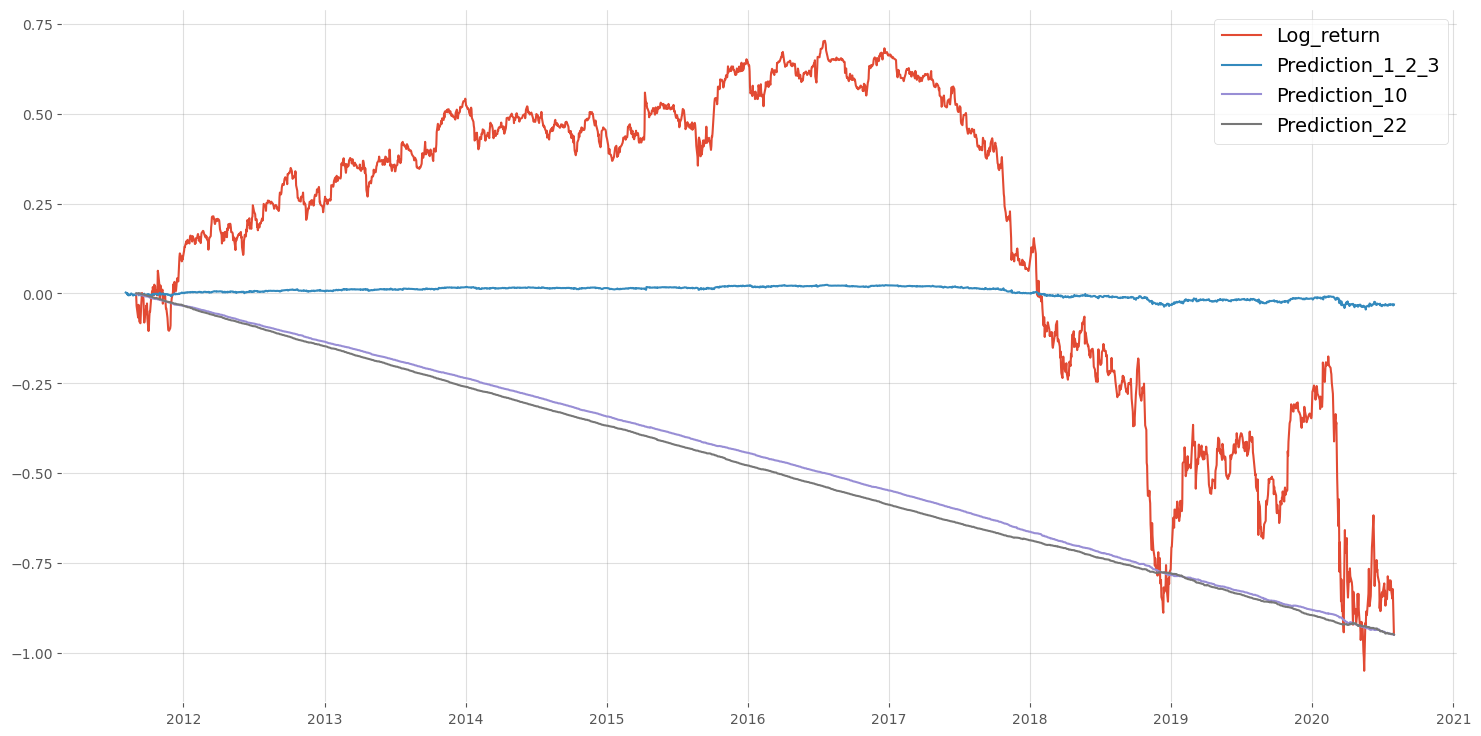

In [34]:
plt.figure(figsize=(18,9))
plt.plot(ge2["Log_return"].cumsum(), label="Log_return")
plt.plot(ge1["Prediction"].cumsum(), label="Prediction_1_2_3")
plt.plot(ge2["Prediction_10"].cumsum(), label = "Prediction_10")
plt.plot(ge2["Prediction_22"].cumsum(), label="Prediction_22")
plt.legend()
plt.show()

###  <font color = blue> 👉 Question 6. </font> Now, let's define performance metrics for accuracy.

### In our class, we calculated accuracy with the operational knowledge that, while it's theoretically possible for both returns and predictions to be positive, negative, or zero, only returns contained zero values. Predictions, on the other hand, did not include zeros; as a result, we considered them invalid predictions rather than irrelevant.

### Below, you will find two prototype functions (namely, `calculate_accuracy_A` and `calculate_accuracy_B`) that you can adapt for accuracy calculations. Please evaluate both functions and decide which one you prefer to use as a prototype for your work. Subsequently, explain why you favor the specific function for assessing accuracy.

### Then, using the chosen prototype of function, revise it and execute to assess the accuracy of the predictions obtained from the above lags approaches.

For calculate_accuracy_B, it's obvious that it just calculate the right predict direction.

Otherwise, for calculate_accuracy_A, idk why when return equals 0 and prediction is not 0 can be counted as a valid_prediction,
and another one is for how closely the prediction to the real return counted as a valid return. In a word, idk what calculate_accuracy_A calculate what kind of accuracy.

In [35]:
def calculate_accuracy_A(returns, predictions):

    # Ensure returns and predictions have the same length
    assert len(returns) == len(predictions), "Returns and predictions must have the same length."

    # Initialize variables for valid and total predictions
    valid_predictions = 0
    total_predictions = len(returns)

    # Loop through each data point
    for i in range(total_predictions):
        # Check if the return is zero (valid) and the prediction is not zero (invalid)
        if returns[i] == 0 and predictions[i] != 0:
            valid_predictions += 1
        # Check if the return is not zero and the prediction matches closely (within a tolerance, if needed)
        elif returns[i] != 0 and abs(returns[i] - predictions[i]) < tolerance:
            valid_predictions += 1

    # Calculate accuracy
    accuracy_A = valid_predictions / total_predictions

    return accuracy_A

In [36]:
def calculate_accuracy_B(returns_series, predictions_series):
    
    # Correct predictions
    correct_positive = (returns_series > 0) & (predictions_series > 0)
    correct_negative = (returns_series < 0) & (predictions_series < 0)
    correct_zero = (returns_series == 0) & (predictions_series == 0)

    total_correct = correct_positive.sum() + correct_negative.sum() + correct_zero.sum()

    # Incorrect predictions
    incorrect_positive_return = (returns_series > 0) & (predictions_series <= 0)
    incorrect_negative_return = (returns_series < 0) & (predictions_series >= 0)
    incorrect_zero_return = (returns_series == 0) & (predictions_series != 0)

    total_incorrect =\
    (
        incorrect_positive_return.sum()
        + incorrect_negative_return.sum()
        + incorrect_zero_return.sum()
    )

    # Calculate Hit
    accuracy_B = total_correct / (total_correct + total_incorrect)
    
    return accuracy_B

### Below are the lines of code that lead to an answer:

In [37]:
ge1

,Open,High,Low,Close,Adj Close,Volume,Log_return,lag_1,lag_2,lag_3,Prediction
Date,,,,,,,,,,,
2011-08-05,100.042030,101.783463,96.679276,99.141296,75.941666,20699063,0.002426,-0.058945,0.014995,-0.043213,0.002509
2011-08-08,94.097160,96.859428,91.875336,92.655975,70.973969,28915237,-0.067653,0.002426,-0.058945,0.014995,-0.003361
2011-08-09,93.616768,95.838585,88.992973,95.838585,73.411804,33048028,0.033772,-0.067653,0.002426,-0.058945,0.001849
2011-08-10,95.178047,95.418243,90.133911,90.614304,69.410027,22448444,-0.056053,0.033772,-0.067653,0.002426,-0.005313
2011-08-11,90.974602,95.598389,90.073860,94.157211,72.123886,21950836,0.038354,-0.056053,0.033772,-0.067653,0.003119
...,...,...,...,...,...,...,...,...,...,...,...
2020-07-27,42.716629,42.779079,41.779858,41.904762,41.417988,11321478,-0.022108,-0.025901,-0.002837,0.002837,0.000894
2020-07-28,41.842312,43.466042,41.779858,43.028885,42.529049,12174880,0.026472,-0.022108,-0.025901,-0.002837,-0.000719
2020-07-29,43.653397,43.715847,40.718189,41.155346,40.677277,23769339,-0.044518,0.026472,-0.022108,-0.025901,-0.002773


In [38]:
calculate_accuracy_B(ge1["Log_return"],ge1["Prediction"])

0.5026525198938993

In [39]:
len(ge1)

2262

In [40]:
len(ge1)*calculate_accuracy_B(ge1["Log_return"],ge1["Prediction"])

1137.0

In [41]:
len(ge1)-len(ge1)*calculate_accuracy_B(ge1["Log_return"],ge1["Prediction"])

1125.0

In [42]:
calculate_accuracy_B(ge2["Log_return"],ge2["Prediction_10"])

0.5033437360677664

In [43]:
len(ge2)*calculate_accuracy_B(ge2["Log_return"],ge2["Prediction_10"])

1129.0

In [44]:
len(ge2)-len(ge2)*calculate_accuracy_B(ge2["Log_return"],ge2["Prediction_10"])

1114.0

In [45]:
calculate_accuracy_B(ge2["Log_return"],ge2["Prediction_22"])

0.5064645563976817

In [46]:
len(ge2)*calculate_accuracy_B(ge2["Log_return"],ge2["Prediction_22"])

1136.0000000000002

In [47]:
len(ge2) - len(ge2)*calculate_accuracy_B(ge2["Log_return"],ge2["Prediction_22"])

1106.9999999999998

### <font color = red> Answer 6 </font>
    The prediction is __1137___ times correct and __1125___ wrong. The accuracy is __50.27____ % with a 3-day lag.
    
    The prediction is __1129___ times correct and __1114___ wrong. The accuracy is __50.33____ % with a 10-day lag.
    
    The prediction is __1136___ times correct and ___1107__ wrong. The accuracy is __50.65____ % with a 22-day lag.
    

###  <font color = blue> 👉 Question 7. </font> Please calculate the Sharpe Ratio of the strategies for  `GE`.

### Below are the lines of code that lead to an answer:

In [48]:
np.sqrt(253)*np.mean((np.exp(ge1["Prediction"])-1))/np.std((np.exp(ge1["Prediction"])-1))

-0.13594460146325418

In [49]:
np.sqrt(253)*np.mean((np.exp(ge2["Prediction_10"])-1))/np.std((np.exp(ge2["Prediction_10"])-1))

-19.16257266974208

In [50]:
np.sqrt(253)*np.mean((np.exp(ge2["Prediction_22"])-1))/np.std((np.exp(ge2["Prediction_22"])-1))

-18.869498314244325

### <font color = red> Answer 7 </font>

    The strategy for GE with a 3-day lag leads to a Sharpe ratio of ___-0.13594460146325418_______ .
    
    The strategy for GE with a 3-day lag leads to a Sharpe ratio of __-19.16257266974208________ .
        
    The strategy for GE with a 3-day lag leads to a Sharpe ratio of ___-18.869498314244325_______ .

## 👇 Questions 8 to 10 ask you to build, execute, and backtest a momentum strategy.

###  <font color = blue> 👉 Question 8. </font> Our securities of interest are Goldman Sachs (`GS`) and JP Morgan Chase (`JPM`) stock. The time period for analysis is from November 2013 to October 2021.

### Here’s our use of the momentum indicator, reflecting the moving averages of stock prices for trend following.

### The two moving windows are 24 days and 58 days.

### Calculate and visualize the maximum drawdowns and the longest drawdown periods for `GS` and `JPM`.

### Below are the lines of code that lead to an answer:

In [52]:
gs =pdr.get_data_yahoo("GS", dt.datetime(2013,11,1), dt.datetime(2021,11,1))
jpm =pdr.get_data_yahoo("JPM", dt.datetime(2013,11,1), dt.datetime(2021,11,1))

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [107]:
short_SMA = 24
long_SMA = 58

In [117]:
def q8(stock):
    stock["Log_return"] = np.log(stock["Close"]/stock["Close"].shift(1))
    stock["Long_SMA"] = stock["Close"].rolling(long_SMA).mean()
    stock["Short_SMA"] = stock["Close"].rolling(short_SMA).mean()

    stock["Position"] = np.where(stock["Short_SMA"] > stock["Long_SMA"], 1, 0)
    stock["Log_strategy"] = stock["Log_return"]*stock["Position"]
    stock["Buy_or_Sell"] = stock["Position"].diff()

    #Calculate the maximum drawdowns  
    stock["Cumulative_return"] = stock["Log_strategy"].cumsum().apply(np.exp)
    stock["Max_performance"] = stock["Cumulative_return"].cummax()
    stock["Drawdown"] = -(stock["Cumulative_return"] - stock["Max_performance"])/stock["Max_performance"]
    max_drawdown = stock["Drawdown"].max()
    print(f"Max drawdon is {max_drawdown}")

    #visualize
    plt.figure(figsize=(18,9))
    plt.plot(stock[["Cumulative_return", "Max_performance"]])
    plt.show()

    #longest drawdown period
    periods = (
    stock[stock["Drawdown"]==0]["Drawdown"].index[1:].to_pydatetime()
    -
    stock[stock["Drawdown"]==0]["Drawdown"].index[:-1].to_pydatetime()
    )

    print(f"The longest drawdown period is {periods.max().days} days")

Max drawdon is 0.22526867747709764


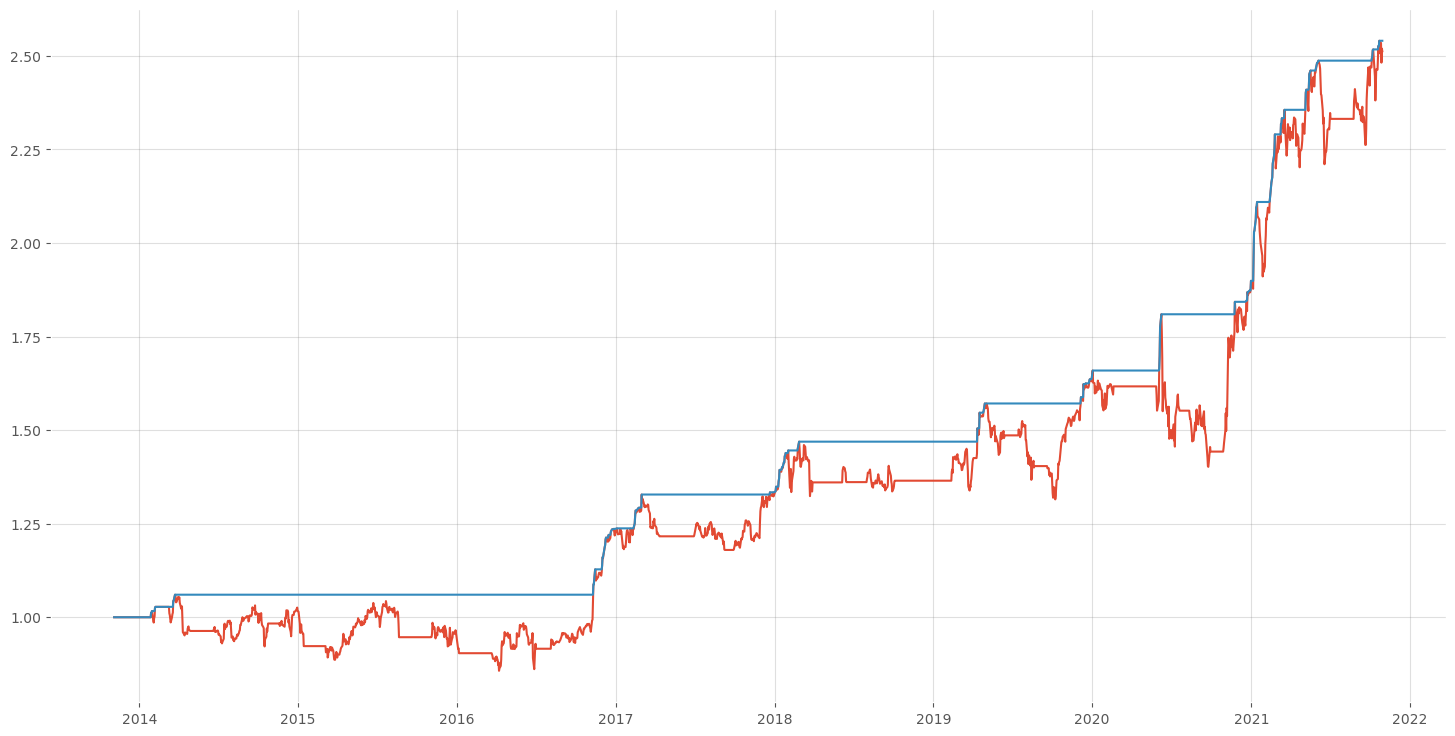

The longest drawdown period is 962 days


In [118]:
q8(jpm)

In [120]:
# gs["Log_return"] = np.log(gs["Close"]/gs["Close"].shift(1))
# gs["Long_SMA"] = gs["Close"].rolling(long_SMA).mean()
# gs["Short_SMA"] = gs["Close"].rolling(short_SMA).mean()

# gs["Position"] = np.where(gs["Short_SMA"] > gs["Long_SMA"], 1, 0)
# gs["Log_strategy"] = gs["Log_return"]*gs["Position"]
# gs["Buy_or_Sell"] = gs["Position"].diff()

# #Calculate the maximum drawdowns  
# gs["Cumulative_return"] = gs["Log_strategy"].cumsum().apply(np.exp)
# gs["Max_performance"] = gs["Cumulative_return"].cummax()
# gs["Drawdown"] = -(gs["Cumulative_return"] - gs["Max_performance"])/gs["Max_performance"]
# max_drawdown = gs["Drawdown"].max()
# print(f"Max drawdon is {max_drawdown}")

# #visualize
# plt.figure(figsize=(18,9))
# plt.plot(gs[["Cumulative_return", "Max_performance"]])
# plt.show()

# #longest drawdown period
# periods = (
#     gs[gs["Drawdown"]==0]["Drawdown"].index[1:].to_pydatetime()
#     -
#     gs[gs["Drawdown"]==0]["Drawdown"].index[:-1].to_pydatetime()
# )

# print(f"The longest drawdown period is {periods.max().days} days")

### <font color = red> Answer 8 (`visualization component`) is presented in the cell below: </font>

Max drawdon is 0.22526867747709764


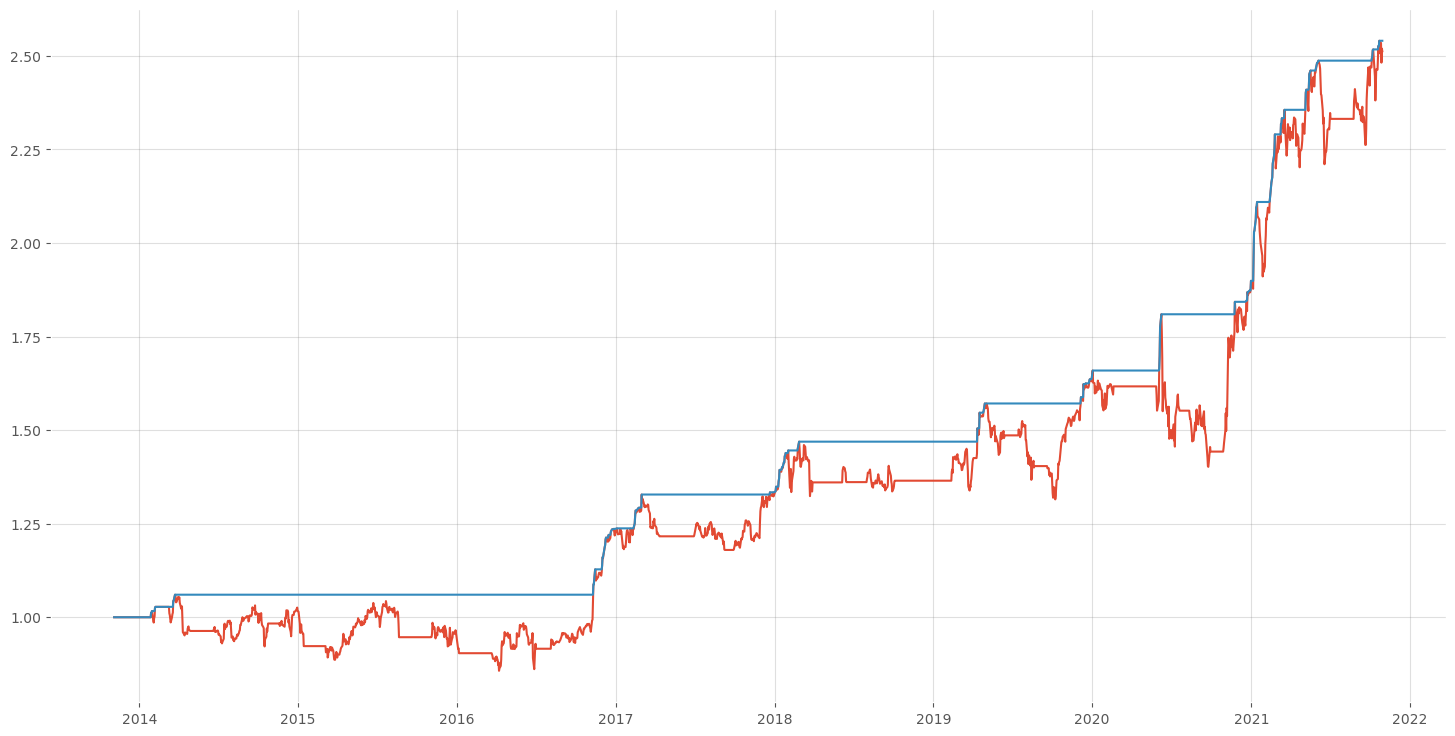

The longest drawdown period is 962 days


In [119]:
q8(jpm)

Max drawdon is 0.2950832374260445


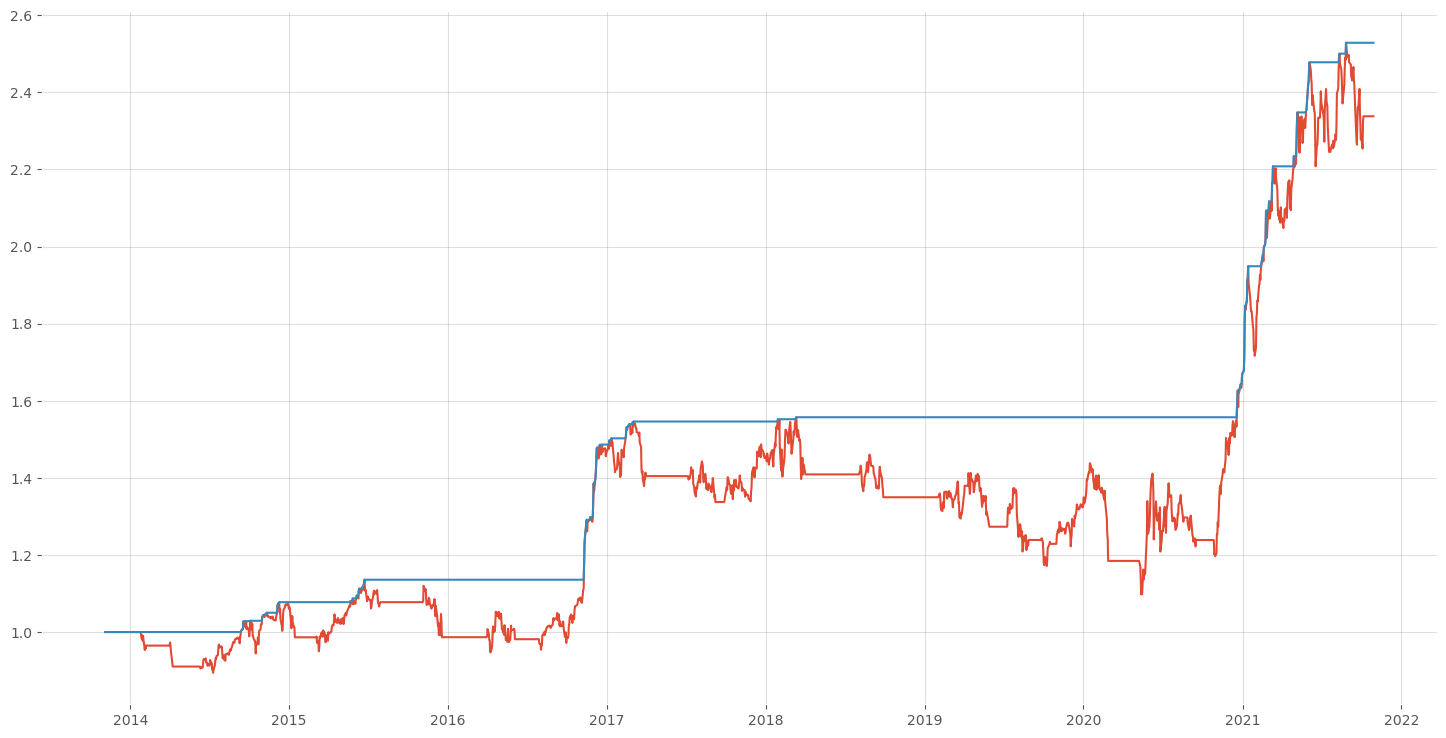

The longest drawdown period is 1015 days


In [121]:
q8(gs)

### <font color = red> Answer 8 </font>
    
    As to GS,
    
    The maximum drawdown is about ____29.51%________ percentage points.
    The longest drawdown period lasts for ____1015_________ days.
    
    As to JPM,
    
    The maximum drawdown is about ____22.53%________ percentage points.
    The longest drawdown period lasts for _____962________ days.
    

###  <font color = blue> 👉 Question 9. </font>  If you had started with a capital of $300,000 for each of the three securities, how much would be left in your account after trading according to your above strategies for `GS` and `JPM`?

### Below are the lines of code that lead to an answer:

In [125]:
def q9(stock, invest_money):
    stock["Log_return"] = np.log(stock["Close"]/stock["Close"].shift(1))
    stock["Long_SMA"] = stock["Close"].rolling(long_SMA).mean()
    stock["Short_SMA"] = stock["Close"].rolling(short_SMA).mean()

    stock["Position"] = np.where(stock["Short_SMA"] > stock["Long_SMA"], 1, 0)
    stock["Log_strategy"] = stock["Log_return"]*stock["Position"]
    stock["Buy_or_Sell"] = stock["Position"].diff()

    left_money = invest_money*np.exp(stock["Log_strategy"].sum())
    print(f"After trading, {left_money} amount of money left.")

In [126]:
q9(jpm, 300000)

After trading, 753654.8138866035 amount of money left.


In [127]:
q9(gs, 300000)

After trading, 701362.105816775 amount of money left.


### <font color = red> Answer 9 </font>

    The answer is ____jpm:753654.8138866035, gs:701362.105816775________________________ .

###  <font color = blue> 👉 Question 10. </font> Using the current momentum strategy, how many trading opportunities were there for GS and JPM?

### Below are the lines of code that lead to an answer:

In [133]:
def q10(stock):
    stock["Log_return"] = np.log(stock["Close"]/stock["Close"].shift(1))
    stock["Long_SMA"] = stock["Close"].rolling(long_SMA).mean()
    stock["Short_SMA"] = stock["Close"].rolling(short_SMA).mean()

    stock["Position"] = np.where(stock["Short_SMA"] > stock["Long_SMA"], 1, 0)
    stock["Log_strategy"] = stock["Log_return"]*stock["Position"]
    stock["Buy_or_Sell"] = stock["Position"].diff()

    print(stock["Buy_or_Sell"].value_counts()[1])

In [134]:
q10(jpm)

21


In [135]:
q10(gs)

19


### <font color = red> Answer 10 </font>

    The answer is ______jpm:21, gs:19______________________ .

> 💯 “Thank you for putting your efforts into the individual assessment questions” 😊